In [80]:
import warnings 
warnings.filterwarnings('ignore')

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [82]:
df = pd.read_csv('supermarket_sales.csv')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [84]:
df.shape

(1000, 17)

In [85]:
df.duplicated().any()

False

In [86]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [87]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## step 2


In [88]:
df["Date"] = pd.to_datetime(df["Date"])

In [104]:
df["Month"] = df["Date"].dt.month

In [90]:
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [91]:
def pie(column):
    plt.pie(df[column].value_counts(), labels = df[column].value_counts().index, autopct = "%1.1f%%", shadow=True)
    plt.show();

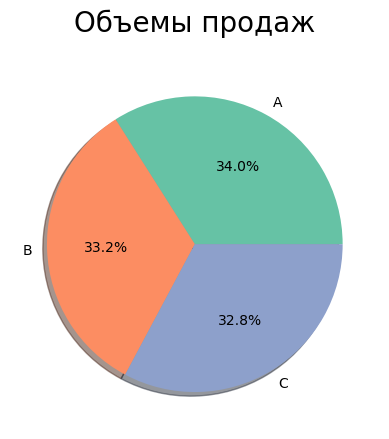

In [92]:
plt.pie(
    df['Branch'].value_counts(), 
    labels = df['Branch'].value_counts().index, 
    autopct = "%1.1f%%", 
    shadow=True,
    colors=sns.color_palette('Set2')

)
plt.rcParams["font.serif"] = "Times New Roman"
plt.title(
    label="Объемы продаж", 
    fontdict={"fontsize":20},
    pad=20
)
plt.show();

В филиалах A самые большие объемы продаж
В филиале C наименьшие объемы продаж

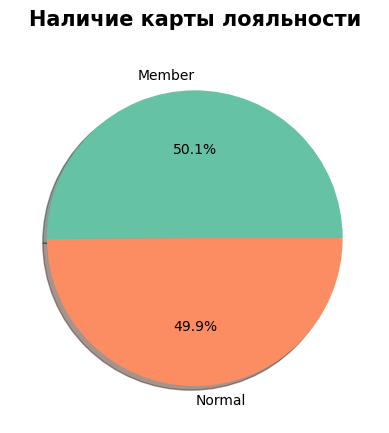

In [93]:

plt.pie(
    df['Customer type'].value_counts(), 
    labels = df['Customer type'].value_counts().index, 
    autopct = "%1.1f%%", 
    shadow=True,
    colors=sns.color_palette('Set2')

)
plt.rcParams["font.serif"] = "Times New Roman"
plt.title(
    label="Наличие карты лояльности", 
    fontdict={"fontsize":15},
    pad=20,
    weight="bold"
)
plt.show();

Большинство людей, приходящих в филиалы, имеют карту лояльности.

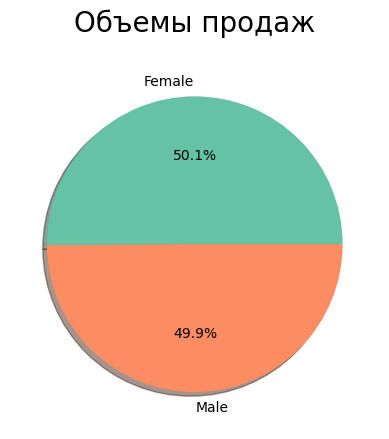

In [94]:

plt.pie(
    df['Gender'].value_counts(), 
    labels = df['Gender'].value_counts().index, 
    autopct = "%1.1f%%", 
    shadow=True,
    colors=sns.color_palette('Set2')

)
plt.rcParams["font.serif"] = "Times New Roman"
plt.title(
    label="Объемы продаж", 
    fontdict={"fontsize":20},
    pad=20
)
plt.show();

Большинство людей, приходящих в филиалы, женского пола

In [95]:
fig=px.histogram(df, x='Product line', y='Quantity',
                color_discrete_sequence=['indianred'],
                text_auto=True, title='Самый продаваемый продукт')
fig.show()

самый высокий процент продаж приходится на электронные аксессуары (Electronic accessories)

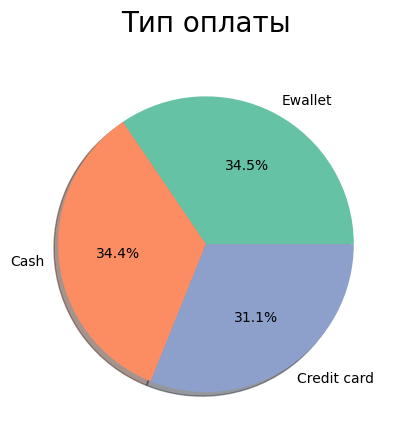

In [96]:
plt.pie(
    df['Payment'].value_counts(), 
    labels = df['Payment'].value_counts().index, 
    autopct = "%1.1f%%", 
    shadow=True,
    colors=sns.color_palette('Set2')

)
plt.rcParams["font.serif"] = "Times New Roman"
plt.title(
    label="Тип оплаты", 
    fontdict={"fontsize":20},
    pad=20
)
plt.show();

Клиенты предпочитали электронные кошельки, наличные платежи

In [97]:
fig=px.histogram(df,x='Product line',y='Unit price',
                color='Product line',
                text_auto=True, opacity=.7, title='Суммарные продажи')

fig.show()

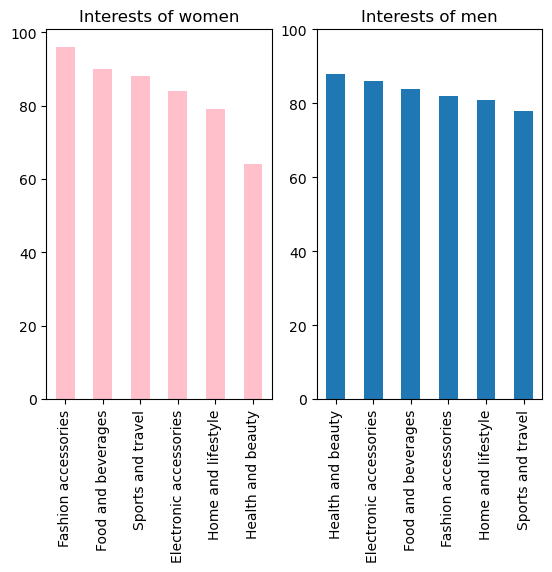

In [98]:
plt.subplot(1, 2, 1)
df['Product line'][(df['Gender']=='Female')].value_counts().plot(kind='bar',color='pink',title='Interests of women')

plt.subplot(1, 2, 2)
df['Product line'][(df['Gender']=='Male')].value_counts().plot(kind='bar',title='Interests of men')

plt.axis([None, None, 0, 100])
plt.show();

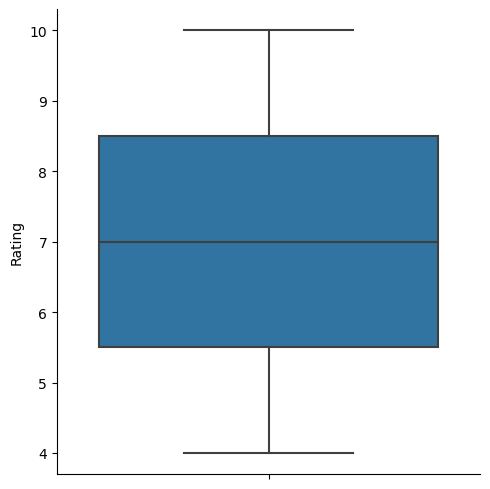

In [99]:
sns.catplot(data=df, y='Rating', kind = "box")
plt.show();

Средняя оценка по продуктам составляет примерно 7

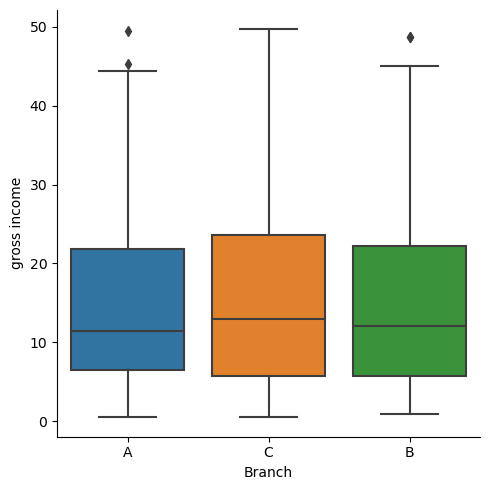

In [100]:
sns.catplot(data=df, y='gross income', x='Branch', kind = "box")
plt.show();

Филиал C немного выделяется более высоким доходом по сравнению с филиалами A и B. Несмотря на то, что в филиале A продажи немного выше, именно филиал C является наиболее прибыльным филиалом с точки зрения валового дохода

In [101]:
fig = px.pie(df,values='Quantity',names='Gender',
             hover_data=['Quantity','Gender'],
             labels={'Gender':'Gender'},
             title='<b> Who buys more : Men or Women?<b>',
             color_discrete_sequence=px.colors.sequential.OrRd_r)


fig.update_traces(textposition='inside',
                  textinfo='percent+label')



fig.show()

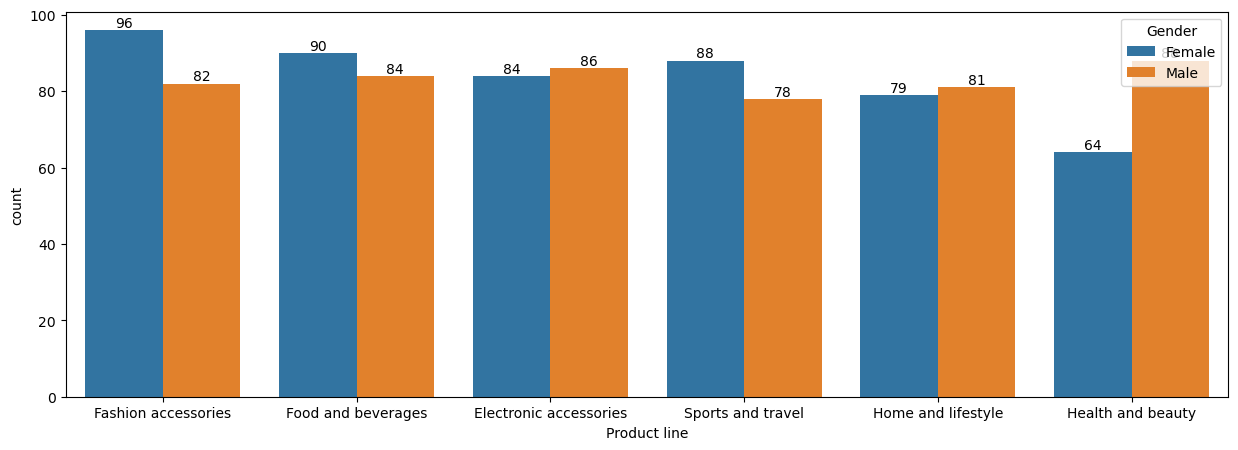

In [102]:
plt.figure(figsize=(15,5))

chart = sns.countplot(x = "Product line", data = df, hue="Gender", order = df["Product line"].value_counts().index)
for num in chart.containers:
    chart.bar_label(num)
    
plt.show();

Когда увеличивается количество женщин, увеличивается линейка модных аксессуаров
Когда увеличивается количество мужчин, увеличивается линейка товаров для здоровья и красоты

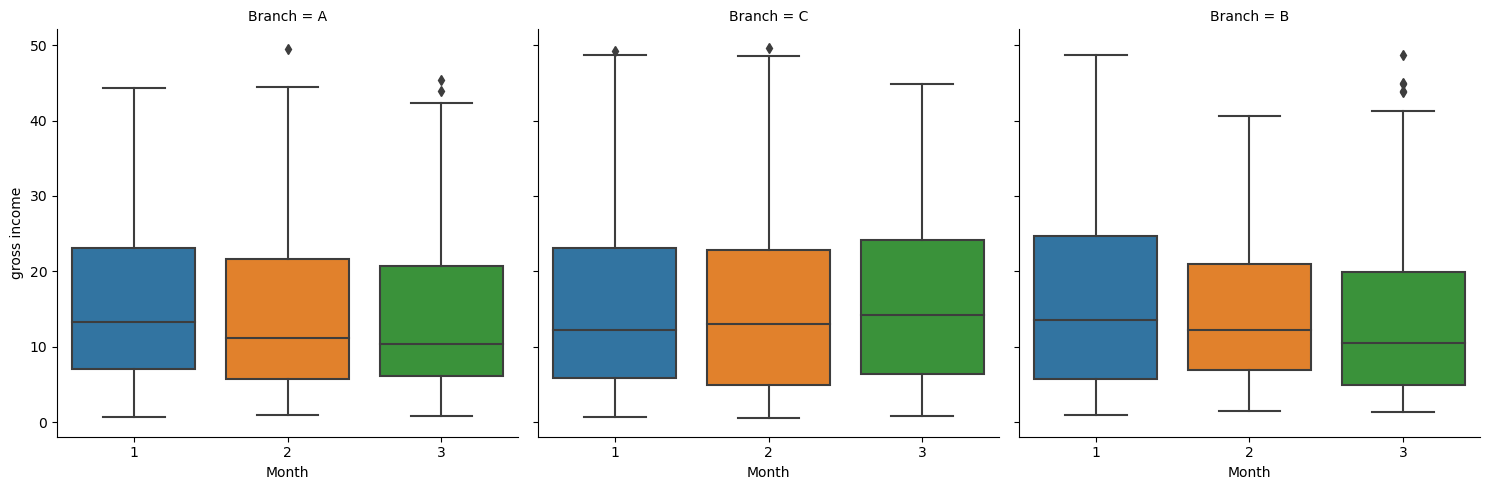

In [105]:
sns.catplot(x = 'Month', y = 'gross income', data = df, kind = "box", col = 'Branch')
plt.xlabel('Month')
plt.ylabel("FRQ")
plt.show()

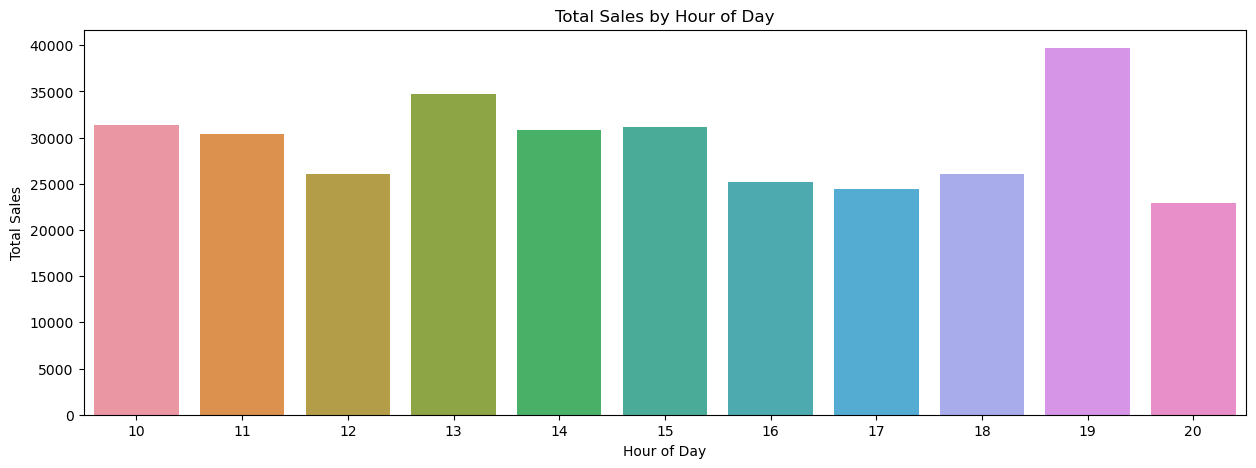

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour

sales_by_hour = df.groupby('Hour')['Total'].sum()

# Plot the total sales by hour
plt.figure(figsize=(15, 5))
sns.barplot(x=sales_by_hour.index, y=sales_by_hour.values)
plt.title('Total Sales by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.show();